<a href="https://colab.research.google.com/github/WooJungE/About_data/blob/main/20230418.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

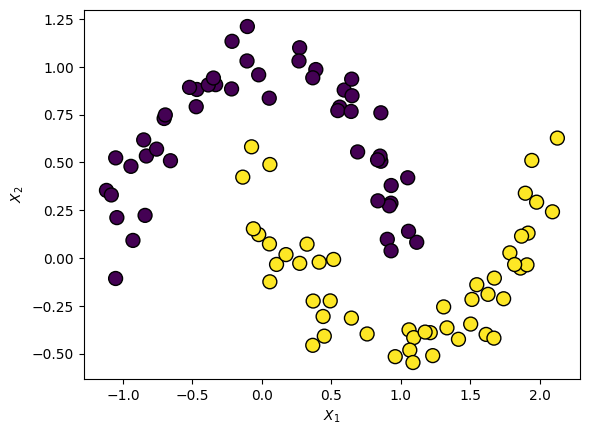

In [6]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def get_moon_data():
  X, y = make_moons(n_samples = 150, noise = 0.1, random_state = 42)
  X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size = .33, random_state = 42)
  return [X_train, X_test, y_train, y_test]

X_train, X_test, y_train, y_test = get_moon_data()

plt.scatter(X_train[:, 0], X_train[:, 1], marker = 'o', c=y_train, s=100, edgecolor='k')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = get_moon_data()

clf = DecisionTreeClassifier(max_depth=3, random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("f1 score is = " + str(f1))

f1 score is = 0.8636363636363636


[Text(0.5, 0.875, 'x[1] <= 0.078\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2, 0.625, 'x[0] <= -0.499\ngini = 0.095\nsamples = 40\nvalue = [2, 38]'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.375, 'x[1] <= 0.032\ngini = 0.05\nsamples = 39\nvalue = [1, 38]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.4, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.8, 0.625, 'x[0] <= 1.493\ngini = 0.32\nsamples = 60\nvalue = [48, 12]'),
 Text(0.7, 0.375, 'x[1] <= 0.599\ngini = 0.171\nsamples = 53\nvalue = [48, 5]'),
 Text(0.6, 0.125, 'gini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

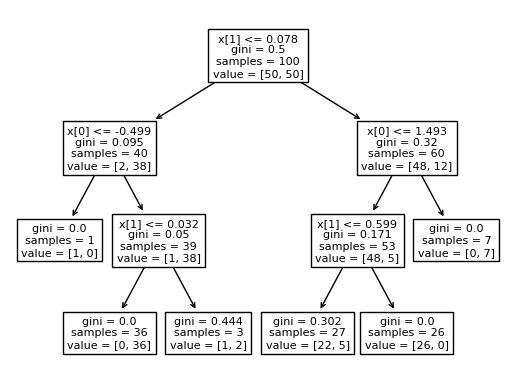

In [8]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [9]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('moon_tree')

'moon_tree.pdf'

In [10]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=['X_1', 'X_2'],
                           class_names=['top', 'bottom'],
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render('moon_tree_ver2')

'moon_tree_ver2.pdf'

In [12]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = get_moon_data()

clf = RandomForestClassifier(max_depth=3, n_estimators=10,
                             max_features='sqrt', random_state=42,
                             oob_score=True)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("f1 score is = "+str(f1))

oob_score = clf.oob_score_
print('OOB score is = '+str(oob_score))

f1 score is = 0.888888888888889
OOB score is = 0.9


In [19]:
from sklearn.datasets import load_iris
dataset = load_iris()
X, y = dataset.data, dataset.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=.33, random_state = 42)

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train,test_size=.33, random_state = 42)

In [21]:
from sklearn.datasets import load_iris
dataset = load_iris()
X,y = dataset.data, dataset.target

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=.33, random_state = 42)

clf = LogisticRegression(multi_class = 'ovr')
scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores)

[1.   0.85 0.9  1.   0.9 ]


In [22]:
from sklearn.datasets import load_iris
dataset = load_iris()
X, y = dataset.data, dataset.target

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = .33, random_state = 42)

params = {'kernel':('linear', 'rbf'), 'C':[1,5,10]}
svc = SVC(gamma='auto')
clf = GridSearchCV(svc, params, cv=5, scoring='f1_macro')
clf.fit(X_train, y_train)

print('Best score is = ', str(clf.best_score_))
print('Best parameters are = ', str(clf.best_params_))

Best score is =  0.9515384615384616
Best parameters are =  {'C': 5, 'kernel': 'linear'}


In [23]:
y_pred = clf.predict(X_test)
f1 = metrics.f1_score(y_test, y_pred, average='macro')
print("f1 score is = " + str(f1))

f1 score is = 0.9784047370254267


In [24]:
from sklearn.datasets import load_iris
dataset = load_iris()
X, y = dataset.data, dataset.target

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = .33, random_state=42)

pca = PCA()
logistic = LogisticRegression(multi_class='ovr', C=1.5)

pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [26]:
param_grid = {
    'pca__n_components' : [2, 3, 4],
    'logistic__C' : [0.5, 1, 5, 10]
}

model = GridSearchCV(pipe, param_grid, cv=5)

model.fit(X_train, y_train)
print("Best parameter(CV score = %0.3f):" % model.best_score_)
print(model.best_params_)

Best parameter(CV score = 0.940):
{'logistic__C': 10, 'pca__n_components': 3}


In [27]:
import pickle
import os
os.makedirs(os.path.dirname('./model_storage/'), exist_ok=True)
pickle.dump(model, open('./model_storage/model.pkl', 'wb'))

In [28]:
model_load = pickle.load(open('./model_storage/model.pkl', 'rb'))
y_pred = model_load.predict(X_test)

In [29]:
y_pred =clf.predict(X_test)
f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print("f1 score is = " + str(f1))

f1 score is = 0.9784047370254267
